In [1]:
# load tidyvers
library(tidyverse)
library(dplyr)
library(ggplot2)
library(readr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
# load data
monthly <- readr::read_csv("monthly_deaths.csv")
yearly <- readr::read_csv("yearly_deaths_by_clinic.csv")

Parsed with column specification:
cols(
  date = col_date(format = ""),
  births = col_double(),
  deaths = col_double()
)
Parsed with column specification:
cols(
  year = col_double(),
  births = col_double(),
  deaths = col_double(),
  clinic = col_character()
)


In [3]:
# check the data
glimpse(monthly)
glimpse(yearly)

Observations: 98
Variables: 3
$ date   <date> 1841-01-01, 1841-02-01, 1841-03-01, 1841-04-01, 1841-05-01,...
$ births <dbl> 254, 239, 277, 255, 255, 200, 190, 222, 213, 236, 235, 307, ...
$ deaths <dbl> 37, 18, 12, 4, 2, 10, 16, 3, 4, 26, 53, 64, 38, 27, 26, 10, ...
Observations: 12
Variables: 4
$ year   <dbl> 1841, 1842, 1843, 1844, 1845, 1846, 1841, 1842, 1843, 1844, ...
$ births <dbl> 3036, 3287, 3060, 3157, 3492, 4010, 2442, 2659, 2739, 2956, ...
$ deaths <dbl> 237, 518, 274, 260, 241, 459, 86, 202, 164, 68, 66, 105
$ clinic <chr> "clinic 1", "clinic 1", "clinic 1", "clinic 1", "clinic 1", ...


In [4]:
# create proportion_deaths column
monthly <- monthly %>%
mutate(proportion_deaths = deaths / births)

yearly <- yearly %>%
mutate(proportion_deaths = deaths / births)

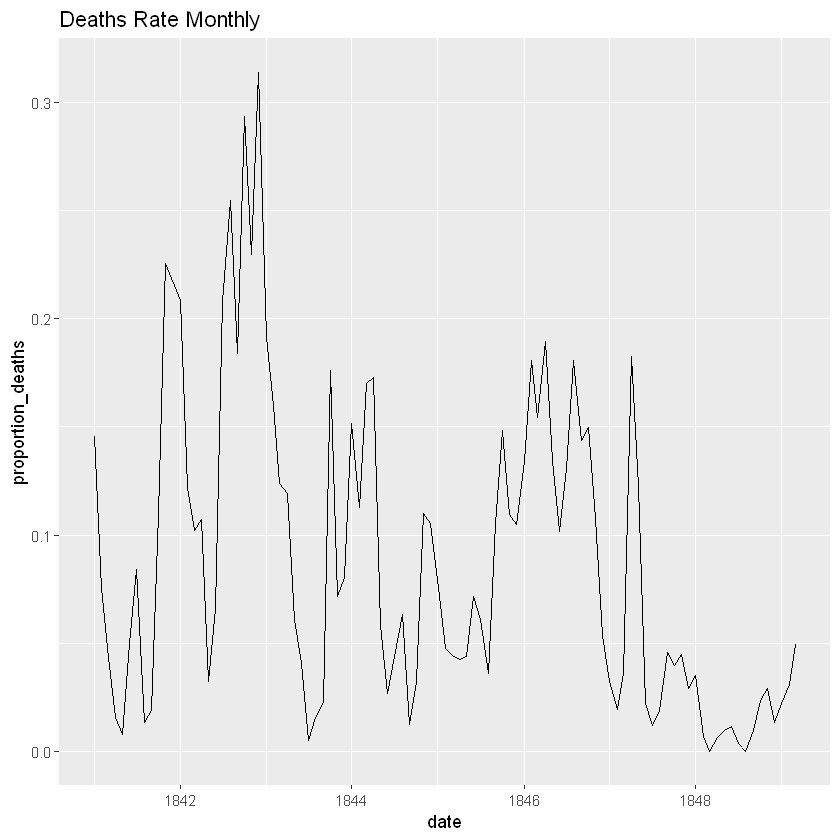

In [5]:
# creating lineplot for monthly data
ggplot(monthly, aes(x = date, y = proportion_deaths)) + geom_line() + ggtitle("Deaths Rate Monthly")

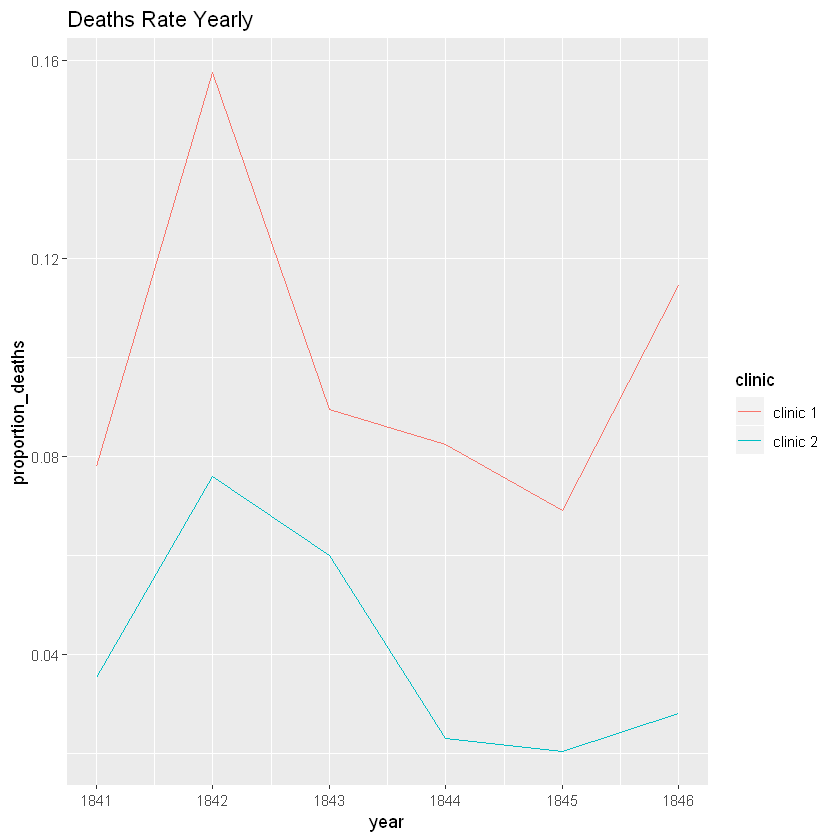

In [6]:
# create line plot for yearly data
ggplot(yearly, aes(x = year, y = proportion_deaths, color = clinic)) + geom_line() + ggtitle("Deaths Rate Yearly")

In [7]:
# saving threshold
th <- as.Date("1847-06-01")

# create new columns in monthly
monthly <- monthly %>%
mutate(handwashing_started = date >= th)

In [8]:
# Creating summary table
monthly_summary <- monthly %>%
group_by(handwashing_started) %>%
summarize(mean_proportion_deaths = mean(proportion_deaths))

monthly_summary

handwashing_started,mean_proportion_deaths
FALSE,0.10504998
TRUE,0.02109338
